--- Step 1.7: Creating Advanced Project Visuals ---


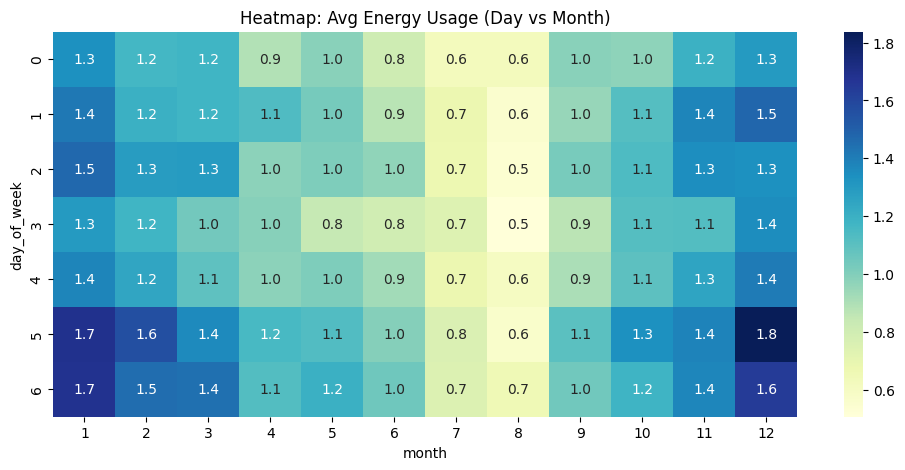

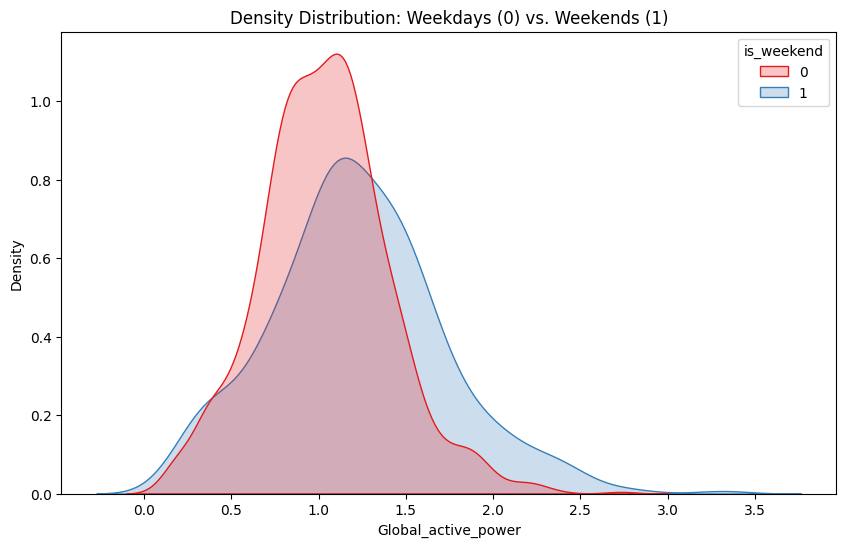

C:\Users\abhij\AppData\Local\Temp\ipykernel_31372\1327700034.py:38: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_30_days = df.last('30D')


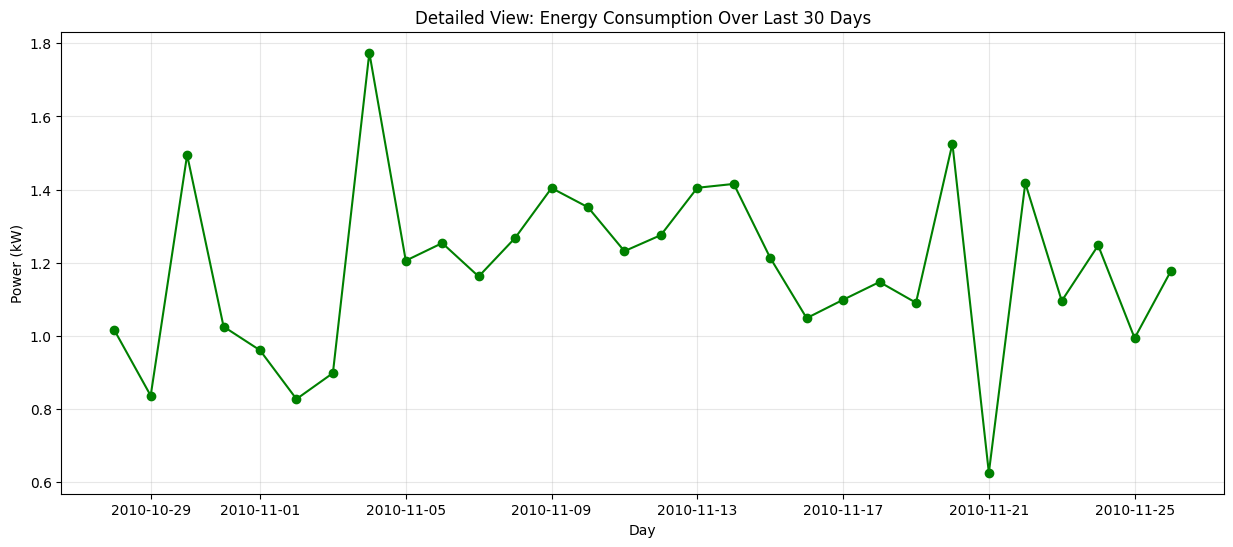

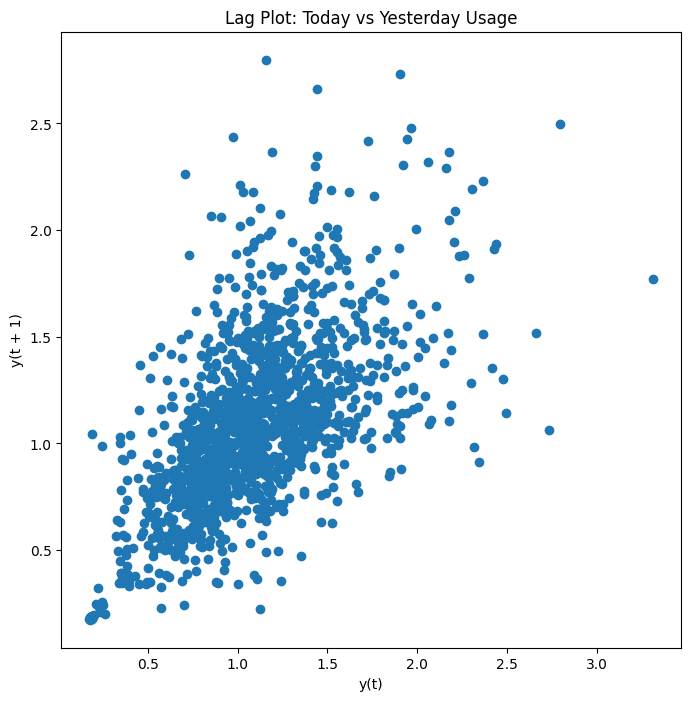

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def run_extra_visuals():
    print("--- Step 1.7: Creating Advanced Project Visuals ---")
    
    # 1. Load Data
    df = pd.read_csv('final_features_pro.csv', index_col='dt', parse_dates=True)
      
    # FIX: Ensure 'is_weekend' exists for the KDE plot
    if 'is_weekend' not in df.columns:
        df['is_weekend'] = (df.index.dayofweek >= 5).astype(int)
    
    # 2. HEATMAP: Day of Week vs. Month
    pivot_table = df.pivot_table(values='Global_active_power', 
                                 index='day_of_week', 
                                 columns='month', 
                                 aggfunc='mean')
    plt.figure(figsize=(12, 5))
    sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
    plt.title('Heatmap: Avg Energy Usage (Day vs Month)')
    plt.savefig('eda_heatmap.png')
    plt.show()

    # 3. KDE PLOT: Weekdays vs. Weekends (Error Fix Applied Here)
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x='Global_active_power', hue='is_weekend', fill=True, common_norm=False, palette='Set1')
    plt.title('Density Distribution: Weekdays (0) vs. Weekends (1)')
    plt.savefig('eda_weekend_density.png')
    plt.show()

    # 4. 30-DAY ZOOM: Looking at Daily Fluctuations
    # Instead of looking at 12 months, we look at the last 30 days of the dataset
    plt.figure(figsize=(15, 6))
    last_30_days = df.last('30D')
    plt.plot(last_30_days.index, last_30_days['Global_active_power'], marker='o', color='green')
    plt.title('Detailed View: Energy Consumption Over Last 30 Days')
    plt.xlabel('Day')
    plt.ylabel('Power (kW)')
    plt.grid(True, alpha=0.3)
    plt.savefig('eda_30_day_zoom.png')
    plt.show()

    # 5. LAG PLOT: Visualizing Correlation (Today vs Yesterday)
    plt.figure(figsize=(8, 8))
    pd.plotting.lag_plot(df['Global_active_power'], lag=1)
    plt.title('Lag Plot: Today vs Yesterday Usage')
    plt.savefig('eda_lag_plot.png')
    plt.show()

    
if __name__ == "__main__":
    run_extra_visuals()